# Popular Data Science Questions in Stack Exchange
## Introduction:
Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science.
[Here](https://stackexchange.com/sites?view=list#percentanswered) is a sample of the most popular sites:
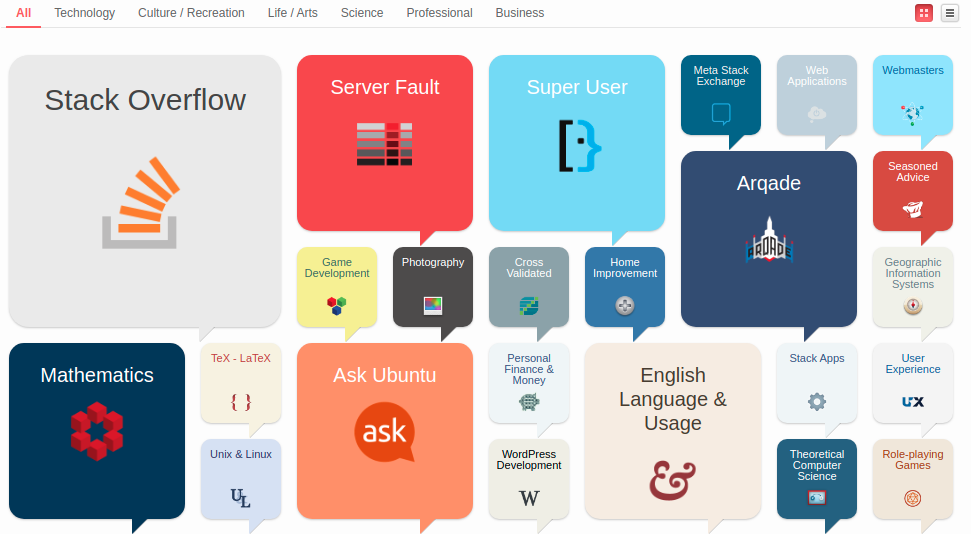
Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

Being a multidisciplinary field, there a few Stack Exchange websites there are relevant to our goal here:
- [Data Science](https://datascience.stackexchange.com/)
- [Cross Validated](https://stats.stackexchange.com/) — a statistics site
- [Artificial Intelligence](https://ai.stackexchange.com/)
- [Mathematics](https://math.stackexchange.com/)
- [Stack Overflow](https://stackoverflow.com/)

And if we want to include Data Engineering, we can also consider:
- [Database Administrators](https://dba.stackexchange.com/)
- [Unix & Linux](https://unix.stackexchange.com/)
- [Software Engineering](https://softwareengineering.stackexchange.com/)

We'll find a complete [list](https://stackexchange.com/sites?view=list#percentanswered) of Stack Exchange websites sorted by percentage of questions that received answers. At the time of this writing, Data Science Stack Exchange (DSSE) is on the bottom 10 sites with respect to this metric.

The fact that DSSE is a data science dedicated site (contrarily to the others), coupled with it having a lot of unanswered questions, makes it an ideal candidate for this investigation.

**What kind of questions are welcome on this site?**

On DSSE's help center's [section on questions](https://datascience.stackexchange.com/help/asking), we can read that we should:
- Avoid subjective questions.
- Ask practical questions about Data Science — there are adequate sites for theoretical questions.
- Ask specific questions.
- Make questions relevant to others.

All of these characteristics, if employed, should be helpful attributes to our goal.

In the help center we also learned that in addition to the sites mentioned in the Learn section, there are other two sites that are relevant:

- [Open Data](https://opendata.stackexchange.com/help/on-topic) (Dataset requests)
- [Computational Science](https://scicomp.stackexchange.com/help/on-topic) (Software packages and algorithms in applied mathematics)

**What, other than questions, does DSSE's home subdivide into?**

On the [home page](https://datascience.stackexchange.com/) we can see that we have four sections:

- [Questions](https://datascience.stackexchange.com/questions) — a list of all questions asked
- [Tags](https://datascience.stackexchange.com/tags) — a list of tags (keywords or labels that categorize questions)
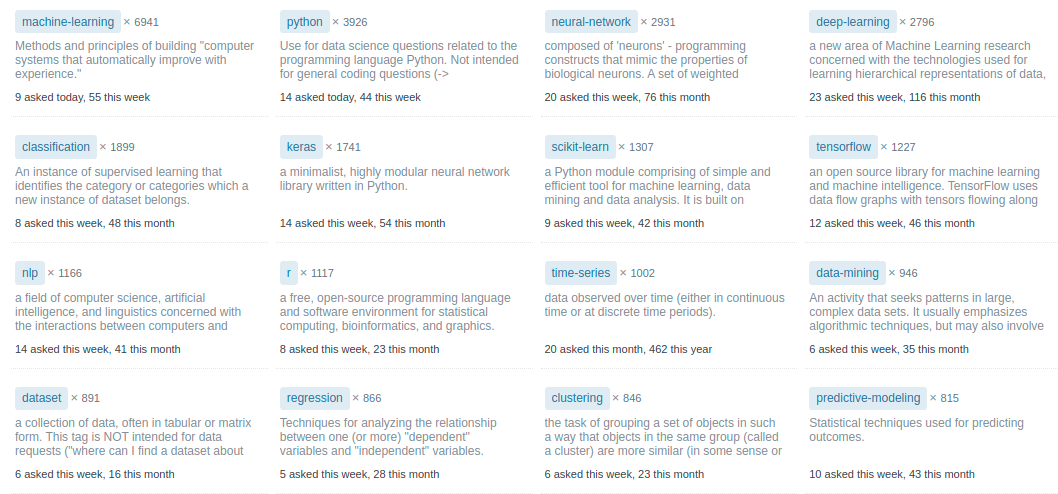
- [Users](https://datascience.stackexchange.com/users) — a list of users
- [Unanswered](https://datascience.stackexchange.com/unanswered) — a list of unanswered questions

The tagging system used by Stack Exchange looks just like what we need to solve this problem as it allow us to quantify how many questions are asked about each subject.

Something else we can learn from exploring the help center, is that Stack Exchange's sites are heavily moderated by the community; this gives us some confidence in using the tagging system to derive conclusions.

**What information is available in each post?**

Looking, just as an example, at this question, some of the information we see is:

- For both questions and answers:
 - The posts's score
 - The posts's title
 - The posts's author
 - The posts's body
- For questions only:
 - How many users have it on their "
 - The last time the question as active
 - How many times the question was viewed
 - Related questions
 - The question's tags

## Stack Exchange Data Explorer
Stack Exchange provides a public data base for each of its websites. [Here](https://data.stackexchange.com/datascience/query/new) is a link to query and explore Data Science Stack Exchange's database.

Perusing the table names, a few stand out as relevant for our goal:

- Posts
- PostTags
- Tags
- TagSynonyms

Running a few exploratory queries, leads us to focus our efforts on Posts table. For examples, the [Tags table](https://data.stackexchange.com/datascience/query/1406969) looked very promising as it tells us how many times each tag was used, but there's no way to tell just from this if the interest in these tags is recent or a thing from the past.

## Getting the Data
Since we're only interested in recent posts, we'll limit our analysis to the posts of 2020.

To get the relevant data we run the following query.

SELECT Id,
       CreationDate,
       Score,
       ViewCount,
       Tags,
       AnswerCount,
       FavoriteCount
  FROM posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2020;

Here is the [result](https://data.stackexchange.com/datascience/query/1407169) of above query.

## Exploring the Data
We can read in the data while immediately making sure CreationDate will be stored as a datetime object.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
questions = pd.read_csv('2020_questions.csv', parse_dates = ['CreationDate'])

In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079 entries, 0 to 7078
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             7079 non-null   int64         
 1   CreationDate   7079 non-null   datetime64[ns]
 2   Score          7079 non-null   int64         
 3   ViewCount      7079 non-null   int64         
 4   Tags           7079 non-null   object        
 5   AnswerCount    7079 non-null   int64         
 6   FavoriteCount  965 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 387.3+ KB


We see that only FavoriteCount has missing values. A missing value on this column probably means that the question was is not present in any users' favorite list, so we can replace the missing values with zero.

The types seem adequate for every column, however, after we fill in the missing values on FavoriteCount, there is no reason to store the values as floats.

Since the object dtype is a catch-all type, let's see what types the objects in questions["Tags"] are.

In [4]:
questions['Tags'].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

We see that every value in this column is a string. On Stack Exchange, each question can only have a maximum of five tags ([source](https://meta.stackexchange.com/a/18879)), so one way to deal with this column is to create five columns in questions called Tag1, Tag2, Tag3, Tag4, and Tag5 and populate the columns with the tags in each row.

However, since doesn't help is relating tags from one question to another, we'll just keep them as a list.

## Cleaning the Data
Let's begin by fixing FavoriteCount.

In [5]:
questions['FavoriteCount'].fillna(0, inplace = True)
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079 entries, 0 to 7078
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             7079 non-null   int64         
 1   CreationDate   7079 non-null   datetime64[ns]
 2   Score          7079 non-null   int64         
 3   ViewCount      7079 non-null   int64         
 4   Tags           7079 non-null   object        
 5   AnswerCount    7079 non-null   int64         
 6   FavoriteCount  7079 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(1)
memory usage: 359.6+ KB


In [6]:
questions['Tags'] = questions['Tags'].str.replace('^<|>$','').str.split('><')
questions['Tags']

0       [classification, cross-validation, metric, con...
1       [machine-learning, python, nlp, named-entity-r...
2                                         [r, regression]
3                                     [association-rules]
4                       [machine-learning, deep-learning]
                              ...                        
7074                                          [nlp, bert]
7075    [dataset, pandas, data-cleaning, data-engineer...
7076                  [pandas, statistics, visualization]
7077    [machine-learning, scikit-learn, regression, p...
7078           [survival-analysis, time, methods, counts]
Name: Tags, Length: 7079, dtype: object

## Most Used and Most Viewed
We'll begin by counting how many times each tag was used.

In [7]:
tag_count = {}
for tags in questions['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
tag_count = pd.DataFrame.from_dict(tag_count, orient = 'index')
tag_count.rename(columns = {0: 'Count'}, inplace = True)
tag_count

,Count
classification,616
cross-validation,151
metric,64
confusion-matrix,44
grid-search,35
...,...
momentum,1
software-development,1
federated-learning,1
concept-drift,1


In [8]:
most_used = tag_count.sort_values(by = 'Count').tail(20)
most_used

,Count
feature-selection,190
predictive-modeling,199
r,206
clustering,231
statistics,241
pandas,260
lstm,286
dataset,288
cnn,334
regression,347


The threshold of 20 is somewhat arbitrary and we can experiment with others, however, popularity of the tags rapidly declines, so looking at these tags should be enough to help us with our goal. Let's visualize these data.

<AxesSubplot:>

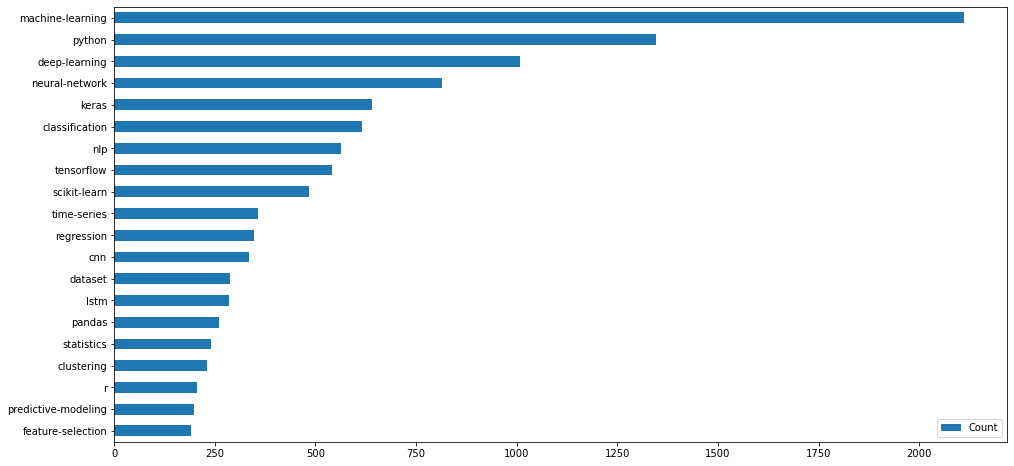

In [9]:
most_used.plot(kind = 'barh', figsize = (16, 8))

Some tags are very, very broad and are unlikely to be useful; e.g.: python, dataset, r. Before we investigate the tags a little deeper, let's repeat the same process for views.

<AxesSubplot:>

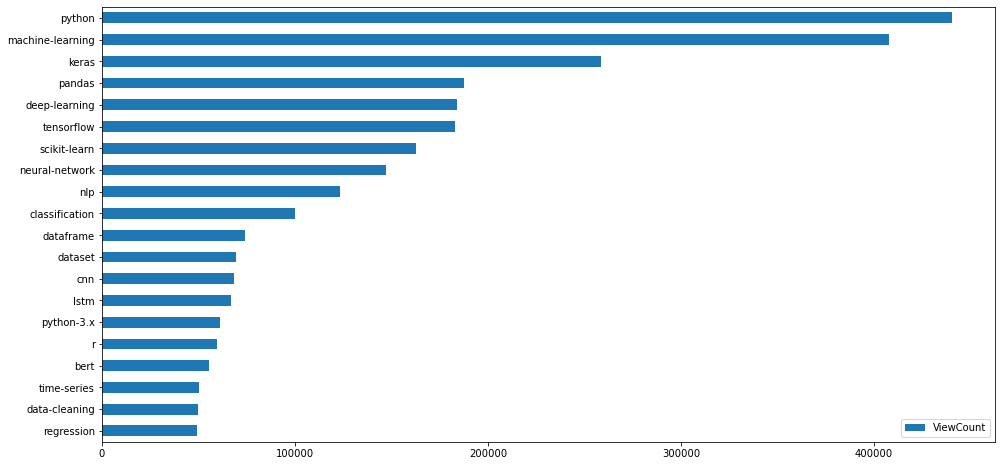

In [10]:
tag_view_count = {}
for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient = 'index')
tag_view_count.rename(columns = {0: 'ViewCount'}, inplace = True)

most_viewed = tag_view_count.sort_values(by = 'ViewCount').tail(20)
most_viewed.plot(kind = 'barh', figsize = (16,8))

array([<AxesSubplot:title={'center':'ViewCount'}>], dtype=object)

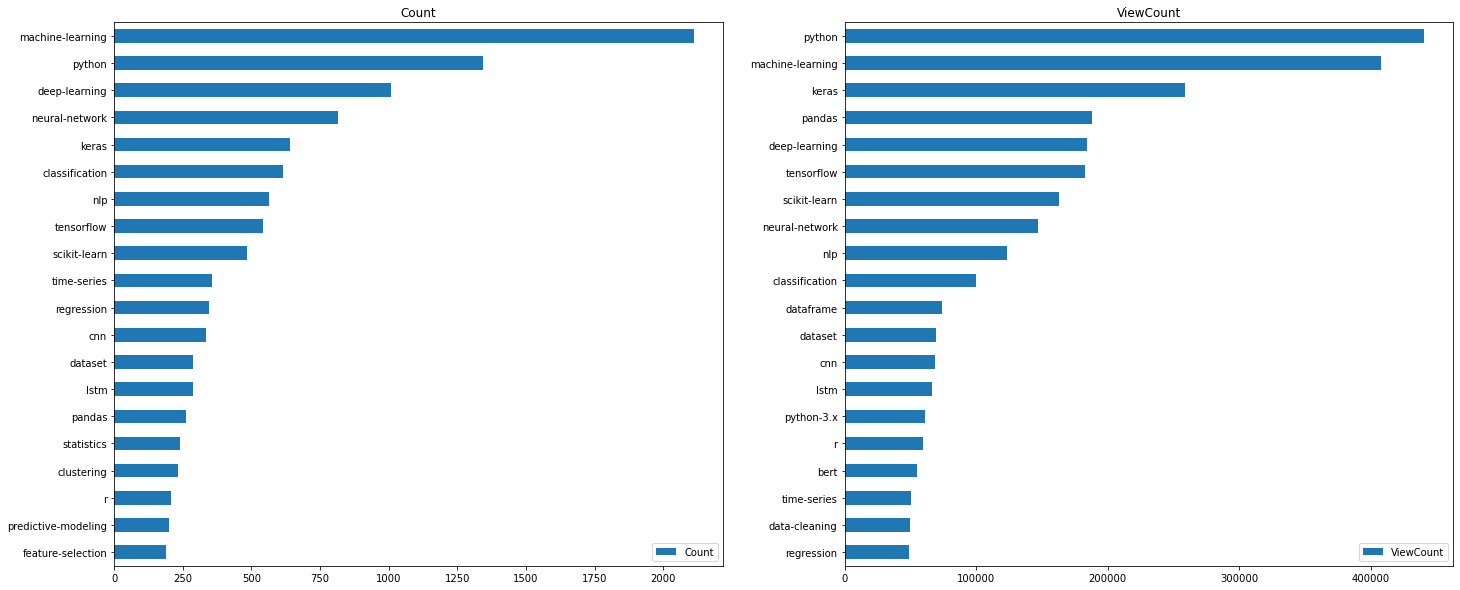

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches((24,10))
most_used.plot(kind = 'barh', ax = axes[0], subplots = True)
most_viewed.plot(kind = 'barh', ax = axes[1], subplots = True)

In [12]:
in_used = pd.merge(most_used, most_viewed, how = 'left', left_index = True, right_index = True)
in_viewed = pd.merge(most_used, most_viewed, how = 'right', left_index = True, right_index = True)

## Relations Between Tags
One way of trying to gauge how pairs of tags are related to each other, is to count how many times each pair appears together.

In [13]:
all_tags = [tag_count.index]

In [14]:
associations = pd.DataFrame(index = all_tags, columns = all_tags)
associations.fillna(0, inplace = True)
for tags in questions['Tags']:
    associations.loc[tags, tags] += 1

In [15]:
relations_most_used = associations.loc[most_used.index, most_used.index]
relations_most_used

,feature-selection,predictive-modeling,r,clustering,statistics,pandas,lstm,dataset,cnn,regression,time-series,scikit-learn,tensorflow,nlp,classification,keras,neural-network,deep-learning,python,machine-learning
feature-selection,190,6,5,6,7,6,3,6,1,9,2,21,0,5,9,2,15,14,28,73
predictive-modeling,6,199,5,7,19,3,5,11,1,25,24,10,3,2,28,2,10,14,39,90
r,5,5,206,11,13,1,2,11,0,16,10,1,2,6,11,6,11,2,25,50
clustering,6,7,11,231,4,2,0,6,0,4,8,20,3,12,20,0,2,5,51,54
statistics,7,19,13,4,241,3,2,14,0,19,16,7,3,6,15,1,8,17,30,89
pandas,6,3,1,2,3,260,2,20,0,3,13,27,0,8,2,3,2,0,160,24
lstm,3,5,2,0,2,2,286,2,16,8,73,0,36,25,7,85,51,79,37,68
dataset,6,11,11,6,14,20,2,288,7,12,17,10,14,17,21,10,17,29,35,84
cnn,1,1,0,0,0,0,16,7,334,5,10,3,52,5,20,78,80,126,36,79
regression,9,25,16,4,19,3,8,12,5,347,31,38,8,4,36,21,31,20,57,117


It's hard for a human to understand what is going on in this dataframe. Let's create a heatmap. But before we do it, let's get rid of the values in diagonal, otherwise the colors will be too skewed.

In [16]:
import numpy as np
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = np.NaN

<AxesSubplot:xlabel='None', ylabel='None'>

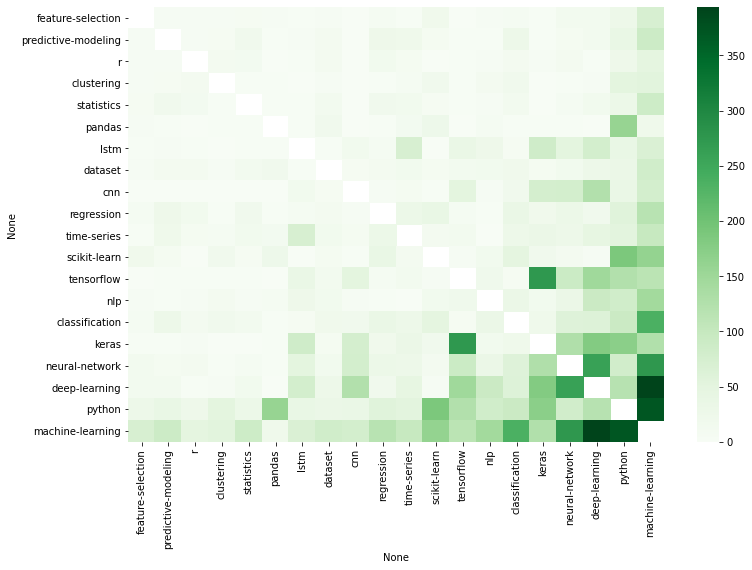

In [17]:
plt.figure(figsize = (12,8))
sns.heatmap(relations_most_used, cmap = 'Greens', annot = False)

The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

A more intuitive manifestation of this phenomenon is the following. A lot of people buy bread, a lot of people buy toilet paper, so they end up being purchased together a lot, but purchasing one of them doesn't increase the chances of purchasing the other.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't.

So how do we attack both these problems? There is a powerful data mining technique that allows us to handle this: [association rules](https://en.wikipedia.org/wiki/Association_rule_learning). Association rules allow us to analytically spot relations like "people who purchase milk, also purchase eggs". Moreover, we can also measure how strong this relations are on several fronts: how common the relation is, how strong it is, and how independent the components of the relationship are.

## Enter Domain Knowledge
Keras, scikit-learn, TensorFlow are all Python libraries that allow their users to employ deep learning (a type of neural network).

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.

## Just a Fad?
Before we officially make our recommendation, it would be nice to solidify our findings with additional proof. More specifically, one thing that comes to mind is "Is deep learning just a fad?" Ideally, the content we decide to create will be the most useful for as long as possible. Could interest in deep learning be slowing down?

Let's fetch the results of all questions ever asked on DSSE with the help of the query below.

SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;
 
The result of the above query is [here](https://data.stackexchange.com/datascience/query/1407176).

In [18]:
all_q = pd.read_csv('all_questions.csv', parse_dates = ['CreationDate'])
all_q['Tags'] = all_q['Tags'].str.replace('^<|>$', '').str.split('><')

Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list \["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

In [19]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]:
            return 1
        else:
            return 0
        
all_q['Deep_Learning'] = all_q['Tags'].apply(class_deep_learning)
all_q.sample(20)

,Id,CreationDate,Tags,Deep_Learning
15009,22765,2017-09-01 13:23:49,"[machine-learning, feature-selection, feature-...",0
19688,57427,2019-08-12 08:36:37,"[machine-learning, deep-learning, time-series,...",0
1193,17830,2017-03-23 21:17:10,"[machine-learning, predictive-modeling, regres...",0
12297,84869,2020-11-02 22:44:16,"[python, tensorflow]",0
3582,65023,2019-12-17 17:45:52,"[classification, gan]",0
7748,66389,2020-01-13 09:10:30,"[machine-learning, python, regression, cross-v...",0
14684,38618,2018-09-21 18:43:40,[time-series],0
28275,14662,2016-10-20 12:07:52,"[deep-learning, neural-network, text-mining, c...",1
9445,8428,2015-10-14 05:56:06,"[r, classification, neural-network, visualizat...",0
15229,89658,2021-02-20 15:07:08,[regression],0


The date of creation of this report is 12 May 2021. So, we don't have the data second quarter of 2021, let's remove those dates.

In [20]:
all_q = all_q[(all_q['CreationDate'].dt.year * 100 + all_q['CreationDate'].dt.month) < 202104]
all_q.sort_values(by ='CreationDate', ascending = False).head(5)

,Id,CreationDate,Tags,Deep_Learning
20750,92419,2021-03-31 22:45:30,"[cross-validation, k-nn]",0
20749,92417,2021-03-31 22:00:37,"[deep-learning, classification, pytorch, binary]",1
20748,92416,2021-03-31 21:56:50,"[k-means, matlab]",0
20747,92415,2021-03-31 21:53:39,"[machine-learning, r, regression, predictive-m...",0
20746,92414,2021-03-31 21:19:58,"[machine-learning, classification, class-imbal...",0


In [21]:
def fetch_quarter(datetime):
    year = str(datetime.year)[2:]
    quarter = str(((datetime.month - 1) // 3) + 1)
    return '{y}Q{q}'.format(y = year, q = quarter)

all_q['Quarter'] = all_q['CreationDate'].apply(fetch_quarter)
all_q.head()

,Id,CreationDate,Tags,Deep_Learning,Quarter
0,27599,2018-02-08 11:40:10,"[python, statistics, bayesian]",0,18Q1
1,27602,2018-02-08 13:36:32,[sql],0,18Q1
2,27604,2018-02-08 13:55:34,"[python, keras, numpy]",0,18Q1
3,27611,2018-02-08 16:22:16,"[regression, prediction, churn]",0,18Q1
4,27613,2018-02-08 16:45:45,"[machine-learning, neural-network, algorithms]",0,18Q1


In [22]:
quarterly = all_q.groupby('Quarter').agg({'Deep_Learning': ['sum', 'size']})
quarterly.columns = ['Deep_Learning_Questions', 'Total_Questions']
quarterly['Deep_Learning_Rate'] = quarterly['Deep_Learning_Questions'] / quarterly['Total_Questions']
quarterly.reset_index(inplace = True)
quarterly

,Quarter,Deep_Learning_Questions,Total_Questions,Deep_Learning_Rate
0,14Q2,3,157,0.019108
1,14Q3,4,188,0.021277
2,14Q4,4,214,0.018692
3,15Q1,5,188,0.026596
4,15Q2,6,284,0.021127
5,15Q3,13,310,0.041935
6,15Q4,19,379,0.050132
7,16Q1,39,511,0.076321
8,16Q2,47,511,0.091977
9,16Q3,71,575,0.123478


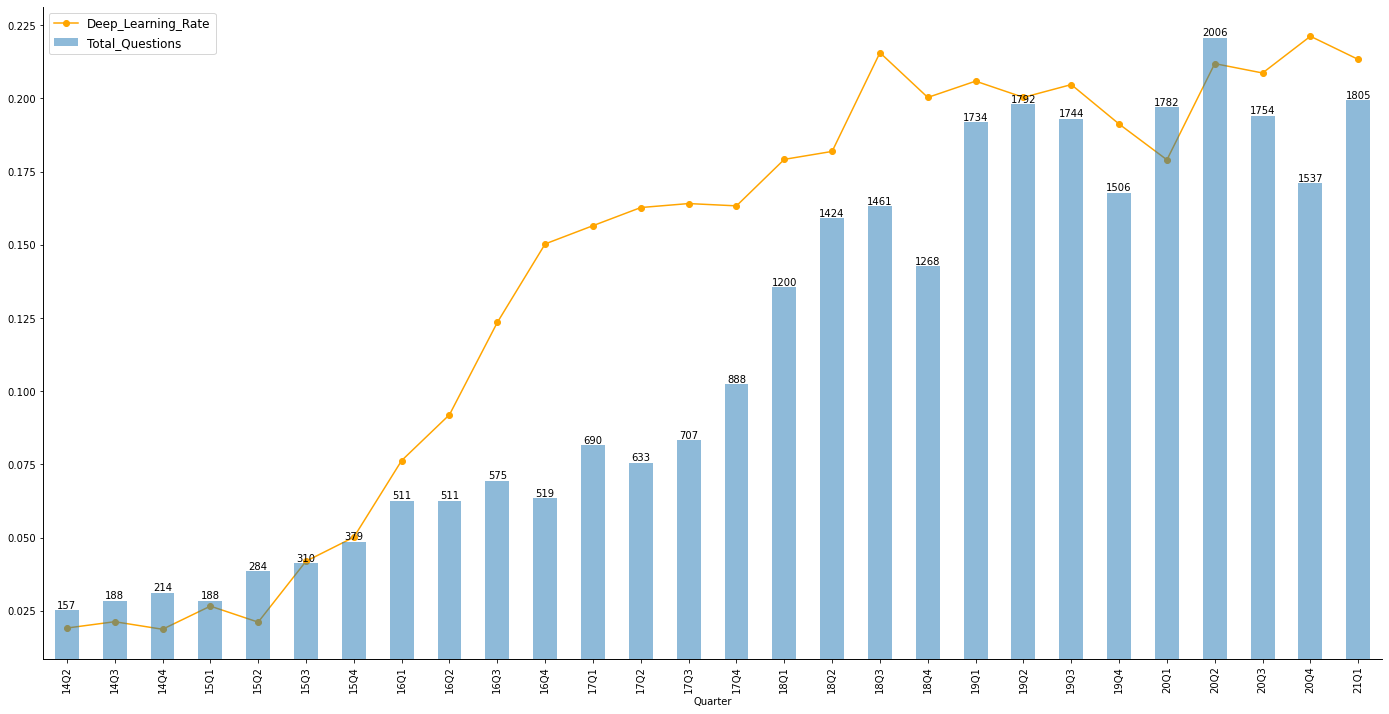

In [23]:
ax1 = quarterly.plot(x = 'Quarter', y = 'Deep_Learning_Rate', kind = 'line', linestyle = '-', marker = 'o', color = 'orange', figsize = (24,12))
ax2 = quarterly.plot(x = 'Quarter', y = 'Total_Questions', kind = 'bar', ax = ax1, secondary_y = True, alpha = 0.5)

for idx, t in quarterly['Total_Questions'].iteritems():
    ax2.text(idx, t, str(t), ha = 'center', va = 'bottom')
    
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing and so we maintain our previous idea of proposing that we create deep learning content.